# KNN model

### Import libraries

In [44]:
### import libs
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error

### Data Processing

In [46]:
data = pd.read_csv('./data/data_train.csv')
data

,grupo,btsId,btsNetNome,lat_x,lon_x,cch,azimuth,RssiId,ponto_id,delay_1,delay_2,delay_3,lat_y,lon_y,indoor,rssi_id,rssi_value
0,1,BTS_1_1,PEMDL01_1,-8.04342,-34.9520,873,0,rssi_1_1,6604,5.0,3.0,2.0,-8.055786,-34.951505,True,rssi_1_1,-103.705000
1,1,BTS_1_1,PEMDL01_1,-8.04342,-34.9520,873,0,rssi_1_1,5515,5.0,3.0,2.0,-8.055784,-34.951608,True,rssi_1_1,-105.225000
2,1,BTS_1_1,PEMDL01_1,-8.04342,-34.9520,873,0,rssi_1_1,5049,5.0,3.0,2.0,-8.055506,-34.951693,True,rssi_1_1,-102.610000
3,1,BTS_1_1,PEMDL01_1,-8.04342,-34.9520,873,0,rssi_1_1,8737,4.0,7.0,2.0,-8.050390,-34.959630,False,rssi_1_1,-89.140000
4,1,BTS_1_1,PEMDL01_1,-8.04342,-34.9520,873,0,rssi_1_1,1203,5.0,3.0,2.0,-8.055380,-34.951736,True,rssi_1_1,-109.088333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60380,3,BTS_3_3,PEMDL09_3,-8.05532,-34.9579,869,240,rssi_3_3,5734,5.0,3.0,2.0,-8.055784,-34.951608,True,rssi_3_3,-108.120000
60381,3,BTS_3_3,PEMDL09_3,-8.05532,-34.9579,869,240,rssi_3_3,5191,5.0,3.0,2.0,-8.055784,-34.951608,True,rssi_3_3,-108.120000
60382,3,BTS_3_3,PEMDL09_3,-8.05532,-34.9579,869,240,rssi_3_3,5390,5.0,3.0,2.0,-8.055784,-34.951608,True,rssi_3_3,-108.120000
60383,3,BTS_3_3,PEMDL09_3,-8.05532,-34.9579,869,240,rssi_3_3,860,5.0,3.0,2.0,-8.055380,-34.951736,True,rssi_3_3,-115.000000


Normalize data using MinMaxScaler for KNN

In [47]:
# features to normalize
features = ["rssi_value", "delay_1", "delay_2", "delay_3"]

scaler = MinMaxScaler()
scaler.fit(data[features])

data.loc[:, features] = scaler.transform(data[features])

data

,grupo,btsId,btsNetNome,lat_x,lon_x,cch,azimuth,RssiId,ponto_id,delay_1,delay_2,delay_3,lat_y,lon_y,indoor,rssi_id,rssi_value
0,1,BTS_1_1,PEMDL01_1,-8.04342,-34.9520,873,0,rssi_1_1,6604,0.571429,0.428571,0.285714,-8.055786,-34.951505,True,rssi_1_1,0.259352
1,1,BTS_1_1,PEMDL01_1,-8.04342,-34.9520,873,0,rssi_1_1,5515,0.571429,0.428571,0.285714,-8.055784,-34.951608,True,rssi_1_1,0.226294
2,1,BTS_1_1,PEMDL01_1,-8.04342,-34.9520,873,0,rssi_1_1,5049,0.571429,0.428571,0.285714,-8.055506,-34.951693,True,rssi_1_1,0.283167
3,1,BTS_1_1,PEMDL01_1,-8.04342,-34.9520,873,0,rssi_1_1,8737,0.428571,1.000000,0.285714,-8.050390,-34.959630,False,rssi_1_1,0.576120
4,1,BTS_1_1,PEMDL01_1,-8.04342,-34.9520,873,0,rssi_1_1,1203,0.571429,0.428571,0.285714,-8.055380,-34.951736,True,rssi_1_1,0.142272
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60380,3,BTS_3_3,PEMDL09_3,-8.05532,-34.9579,869,240,rssi_3_3,5734,0.571429,0.428571,0.285714,-8.055784,-34.951608,True,rssi_3_3,0.163332
60381,3,BTS_3_3,PEMDL09_3,-8.05532,-34.9579,869,240,rssi_3_3,5191,0.571429,0.428571,0.285714,-8.055784,-34.951608,True,rssi_3_3,0.163332
60382,3,BTS_3_3,PEMDL09_3,-8.05532,-34.9579,869,240,rssi_3_3,5390,0.571429,0.428571,0.285714,-8.055784,-34.951608,True,rssi_3_3,0.163332
60383,3,BTS_3_3,PEMDL09_3,-8.05532,-34.9579,869,240,rssi_3_3,860,0.571429,0.428571,0.285714,-8.055380,-34.951736,True,rssi_3_3,0.013702


Create a fingerprint dataframe with necessary features

In [48]:
fingerprint_features = ["rssi_value", "delay_1", "delay_2", "delay_3", "lon_y", "lat_y"]

fingerprint = data.copy()
fingerprint = fingerprint[fingerprint_features]

fingerprint

,rssi_value,delay_1,delay_2,delay_3,lon_y,lat_y
0,0.259352,0.571429,0.428571,0.285714,-34.951505,-8.055786
1,0.226294,0.571429,0.428571,0.285714,-34.951608,-8.055784
2,0.283167,0.571429,0.428571,0.285714,-34.951693,-8.055506
3,0.576120,0.428571,1.000000,0.285714,-34.959630,-8.050390
4,0.142272,0.571429,0.428571,0.285714,-34.951736,-8.055380
...,...,...,...,...,...,...
60380,0.163332,0.571429,0.428571,0.285714,-34.951608,-8.055784
60381,0.163332,0.571429,0.428571,0.285714,-34.951608,-8.055784
60382,0.163332,0.571429,0.428571,0.285714,-34.951608,-8.055784
60383,0.013702,0.571429,0.428571,0.285714,-34.951736,-8.055380


### Model training and testing

In [49]:
# X and y features
fingerprint_X = fingerprint.drop(columns=["lon_y", "lat_y"])
fingerprint_y = fingerprint[["lon_y", "lat_y"]]

# data traind and test split
X_train, X_test, y_train, y_test = train_test_split(fingerprint_X, fingerprint_y, test_size=0.1, random_state=42)

# KNN model training
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsRegressor()

In [50]:
# KNN model prediction
predicted_location = knn.predict(X_test)
predicted_location

array([[-34.951505 ,  -8.055786 ],
       [-34.946976 ,  -8.048578 ],
       [-34.951736 ,  -8.05538  ],
       ...,
       [-34.951693 ,  -8.055506 ],
       [-34.951693 ,  -8.055506 ],
       [-34.9516986,  -8.055576 ]])

### Model evaluation
Metrics: Mean Absolute Error, Root Mean Squared Error, Average Distance, Minimum Error, Maximum Error

In [51]:
# function to calculate distance for each prediction
def calculate_euclidean_distance(y_true, y_pred):
    dist = np.sqrt((y_true[:, 0] - y_pred[:, 0])**2 + (y_true[:, 1] - y_pred[:, 1])**2)
    return dist

# distances
distances = calculate_euclidean_distance(y_test.values, predicted_location)

# MAE and RMSE
mae = mean_absolute_error(y_test, predicted_location)
rmse = np.sqrt(mean_squared_error(y_test, predicted_location))

# min error
min_error = np.min(distances)

# max error
max_error = np.max(distances)

# Print metrics
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'Average Distance: {np.mean(distances)}')
print(f'Minimum Error: {min_error}')
print(f'Maximum Error: {max_error}')

Mean Absolute Error (MAE): 8.987716509361343e-05
Root Mean Squared Error (RMSE): 0.00020820937153360968
Average Distance: 0.0001430586326880749
Minimum Error: 0.0
Maximum Error: 0.0022388327315783674


Plot errors histogram

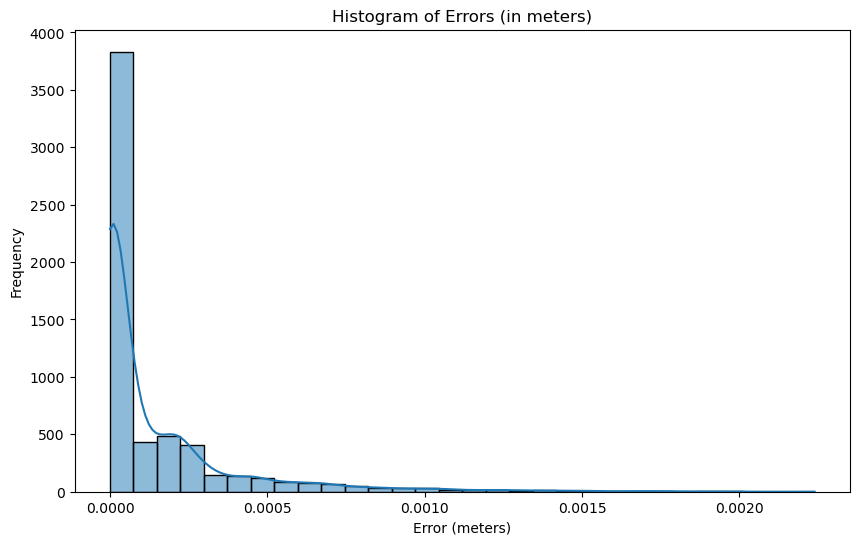

In [53]:
plt.figure(figsize=(10, 6))
sns.histplot(distances, bins=30, kde=True)
plt.title('Histogram of Errors (in meters)')
plt.xlabel('Error (meters)')
plt.ylabel('Frequency')
plt.show()


Plot errors boxplot

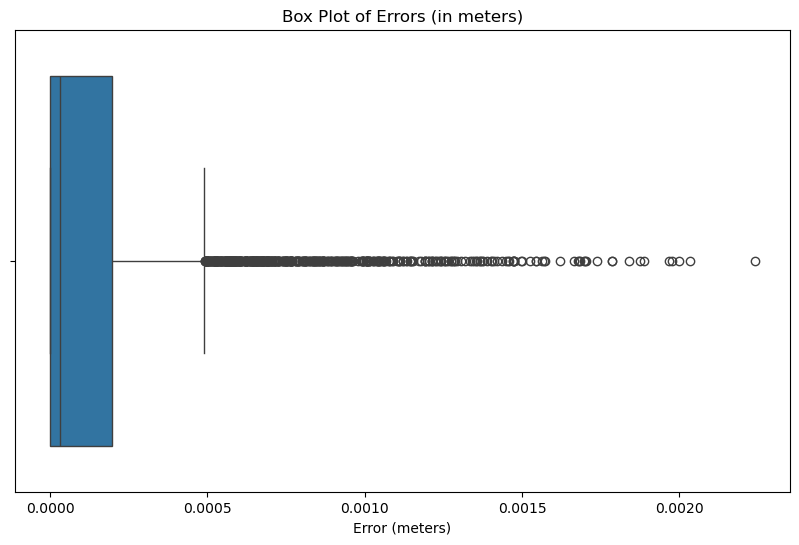

In [54]:
# Plot box plot of errors
plt.figure(figsize=(10, 6))
sns.boxplot(x=distances)
plt.title('Box Plot of Errors (in meters)')
plt.xlabel('Error (meters)')
plt.show()


### Map Visualization

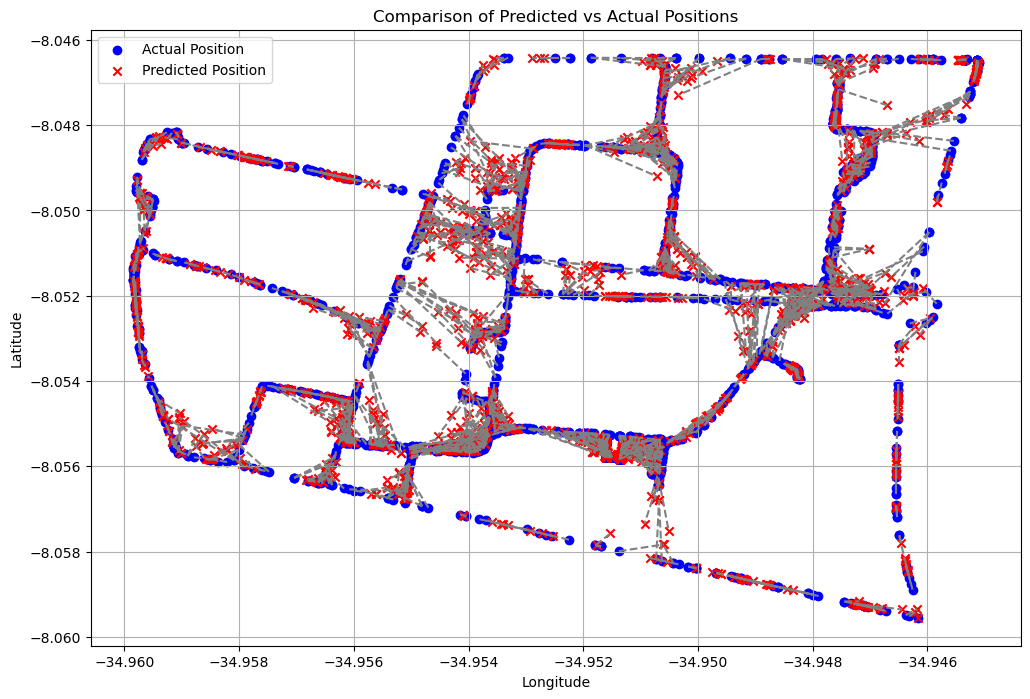

In [55]:
true_lat = y_test['lat_y'].values
true_lon = y_test['lon_y'].values

pred_lat = predicted_location[:, 1]
pred_lon = predicted_location[:, 0]

plt.figure(figsize=(12, 8))
plt.scatter(true_lon, true_lat, color='blue', label='Actual Position')
plt.scatter(pred_lon, pred_lat, color='red', marker='x', label='Predicted Position')

for i in range(len(true_lat)):
    plt.plot([true_lon[i], pred_lon[i]], [true_lat[i], pred_lat[i]], 'gray', linestyle='--')

plt.title('Comparison of Predicted vs Actual Positions')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.grid(True)
plt.show()